In [1]:
import eval
import yaml
import yaml
import matplotlib.pyplot as plt
plt.style.use('ggplot')

stats = yaml.load(open(f'stats_cityscape_0', 'r'))


/data2/kuntai/envs/dds/lib/python3.7/site-packages/ipykernel_launcher.py:7: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  import sys


Text(0, 0.5, 'F1 score')

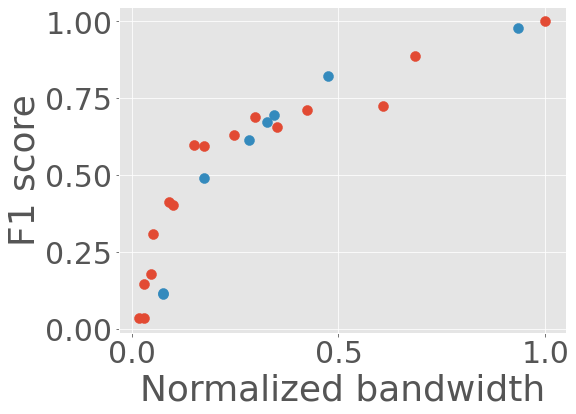

In [15]:


awstream = eval.get_awstream(stats, 0, 20)
overall = eval.get_all(stats, 0,20)
diff = [eval.get_diff(stats, 'diff_results_new/stuttgart_0_Adam_lr_0.5_qp_1_res_1_fr_1_bwweight_%d.txt' % i, 4, 0, 20) for i in  [2,6,10,15,20,25,60,200]]

fig, ax = plt.subplots(figsize=(8, 6))
plt.rcParams["font.size"] = 30

# ax.scatter([i[0] for i in overall], [i[1] for i in overall], s=100)
ax.scatter([i[0] for i in awstream], [i[1] for i in awstream], s=100)
ax.scatter([i[0] for i in diff], [i[1] for i in diff], s=100)
ax.set_xlabel('Normalized bandwidth')
ax.set_ylabel('F1 score')
# plt.scatter([i[0] for i in diff], [i[1] for i in diff])


In [ ]:
sec0[-1]

[1e-07, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
/data2/kuntai/envs/dds/lib/python3.7/site-packages/ipykernel_launcher.py:11: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  # This is added back by InteractiveShellApp.init_path()


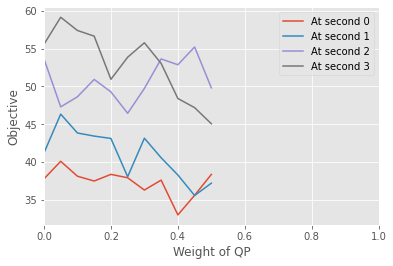

In [3]:
from collections import defaultdict
secs = [1e-7, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.65, 0.75, 0.85, 0.9, 0.95, 1]
# secs = [secs[i] for i in range(len(secs)) if i%4 in [0, 1]]

print(secs)

results = defaultdict(dict)

for i, sec in enumerate(secs):

    temp = yaml.load(open(f'diff_results_old_objective/stuttgart_0_static_qp_{sec}_res_1.0_fr_1.0.txt', 'r'))

    for time, entry in enumerate(temp):
        results[i][time] = entry


for time in range(4):
    plt.plot(secs, [results[i][time]['fuse_obj'] for i in range(len(secs))], label=f'At second {time}')
plt.xlabel('Weight of QP')
plt.xlim(0, 1)
plt.ylabel('Objective')
plt.legend()

In [7]:
from collections import defaultdict
secs = [1e-6, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.65, 0.75, 0.85, 0.9, 0.95, 1]


print(secs)

results = defaultdict(dict)

for i, sec in enumerate(secs):

    temp = yaml.load(open(f'diff_results_dense_interp/stuttgart_0_lr_0.0_qp_{sec}_res_1e-06_fr_1e-06.txt', 'r'))

    for time, entry in enumerate(temp):
        results[i][time] = entry

[1e-06, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.65, 0.75, 0.85, 0.9, 0.95, 1]
/data2/kuntai/envs/dds/lib/python3.7/site-packages/ipykernel_launcher.py:11: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  # This is added back by InteractiveShellApp.init_path()


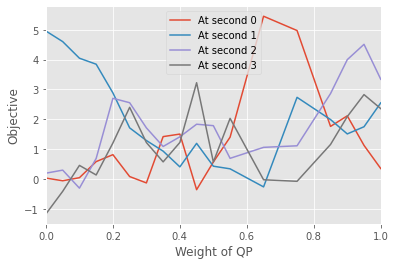

In [14]:

for time in range(4):
    plt.plot(secs, [results[i][time]['fuse_obj'] for i  in range(len(secs))], label=f'At second {time}')
# for time in range(4, 5):
#     plt.plot(secs, [results[i][time]['true_obj'] for i in range(len(secs))], label=f'At second {time}')
plt.xlim(0, 1)
plt.xlabel('Weight of QP')
plt.ylabel('Objective')
plt.legend()

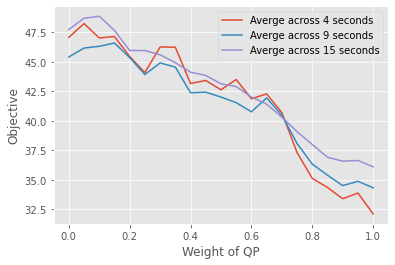

In [20]:
import numpy as np
plt.xlabel('Weight of QP')
plt.ylabel('Objective')
plt.plot(secs, [np.mean([results[i][time]['fuse_obj'] for time in range(4)]) for i in range(len(secs))], label='Averge across 4 seconds')
plt.plot(secs, [np.mean([results[i][time]['fuse_obj'] for time in range(9)]) for i in range(len(secs))], label='Averge across 9 seconds')
plt.plot(secs, [np.mean([results[i][time]['fuse_obj'] for time in range(15)]) for i in range(len(secs))], label='Averge across 15 seconds')
plt.legend()